In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import urllib.request as url

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/train_df.csv', sep = ',', index_col = 0)
validation_df = pd.read_csv('/content/drive/MyDrive/validation_df.csv', sep = ',', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/test_df.csv', sep = ',', index_col = 0)

In [4]:
train_df = train_df[train_df.finding_labels != 'No Finding']
validation_df = validation_df[validation_df.finding_labels != 'No Finding']
test_df = test_df[test_df.finding_labels != 'No Finding']

In [5]:
infiltration, _ = train_test_split(train_df[train_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(train_df[train_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(train_df[train_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(train_df[train_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(train_df[train_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(train_df[train_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(train_df[train_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(train_df[train_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(train_df[train_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = train_df[train_df.finding_labels == 'Edema']   
train_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
train_df['finding_labels'].value_counts()      

Atelectasis           585
Edema                 578
Pneumothorax          566
Pleural_Thickening    565
Fibrosis              563
Emphysema             556
Consolidation         550
Nodule                549
Effusion              546
Infiltration          526
Name: finding_labels, dtype: int64

In [6]:
infiltration, _ = train_test_split(validation_df[validation_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(validation_df[validation_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(validation_df[validation_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(validation_df[validation_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(validation_df[validation_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(validation_df[validation_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(validation_df[validation_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(validation_df[validation_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(validation_df[validation_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = validation_df[validation_df.finding_labels == 'Edema']   
validation_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
validation_df['finding_labels'].value_counts()      

Edema                 35
Emphysema             31
Pleural_Thickening    31
Effusion              29
Atelectasis           29
Infiltration          29
Fibrosis              28
Nodule                26
Pneumothorax          25
Consolidation         24
Name: finding_labels, dtype: int64

In [7]:
infiltration, _ = train_test_split(test_df[test_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(test_df[test_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(test_df[test_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(test_df[test_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(test_df[test_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(test_df[test_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(test_df[test_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(test_df[test_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(test_df[test_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = test_df[test_df.finding_labels == 'Edema']   
test_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
test_df['finding_labels'].value_counts()      

Pleural_Thickening    22
Pneumothorax          22
Emphysema             19
Fibrosis              18
Nodule                18
Atelectasis           17
Infiltration          17
Effusion              16
Edema                 15
Consolidation         13
Name: finding_labels, dtype: int64

In [8]:
fibrosis = train_df[train_df.finding_labels == 'Fibrosis']
fibrosis['class_name'] =  1
others = train_df[train_df.finding_labels != 'Fibrosis']
others = train_df[train_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
train_df_ = pd.concat([fibrosis, others])

In [9]:
fibrosis = validation_df[validation_df.finding_labels == 'Fibrosis']
fibrosis['class_name'] =  1
others = validation_df[validation_df.finding_labels != 'Fibrosis']
others = validation_df[validation_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
validation_df_ = pd.concat([fibrosis, others])

In [10]:
fibrosis = test_df[test_df.finding_labels == 'Fibrosis']
fibrosis['class_name'] =  1
others = test_df[test_df.finding_labels != 'Fibrosis']
others = test_df[test_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
test_df_ = pd.concat([fibrosis, others])

In [14]:
image_generator = ImageDataGenerator(rescale = 1/255, samplewise_center = True, 
                                     samplewise_std_normalization = True,
                                     horizontal_flip = True,
                                     vertical_flip = False,
                                     height_shift_range = 0.05,
                                     width_shift_range = 0.1,
                                     rotation_range = 5,
                                     shear_range = 0.1,
                                     fill_mode = 'reflect',
                                     zoom_range = 0.15)

train_generator = image_generator.flow_from_dataframe(
                                                      dataframe = train_df_,
                                                      directory = '',
                                                      x_col = 'Image Index',
                                                      y_col = 'class_name',
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      class_mode = 'raw',
                                                      target_size = (256, 256))

test_datagen = ImageDataGenerator(samplewise_center = True, 
                                  samplewise_std_normalization = True)

valid_generator = test_datagen.flow_from_dataframe(
                                                      dataframe = validation_df_,
                                                      directory = '.', 
                                                      x_col = 'Image Index',
                                                      y_col = 'class_name',
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      class_mode = 'raw',
                                                      target_size = (256, 256))

test_generator = test_datagen.flow_from_dataframe(
                                                  dataframe = test_df_, 
                                                  directory = '.',
                                                  x_col = 'Image Index',
                                                  y_col = 'class_name',
                                                  batch_size = 32,
                                                  seed = 42,
                                                  shuffle = True,
                                                  class_mode = 'raw',
                                                  target_size = (256, 256))

Found 1117 validated image filenames.
Found 56 validated image filenames.
Found 35 validated image filenames.


In [15]:
model = MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(x)

model = tf.keras.models.Model(inputs = model.input, outputs = x)

9412608/9406464 [==============================] - 0s 0us/step


In [16]:
filepath = "/content/drive/MyDrive/experimentos/multilabel/fibrosis/transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

In [17]:
callbacks = [checkpoint]

In [18]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.0001), loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [19]:
history = model.fit(train_generator, steps_per_epoch = 1117 // 32, 
                    validation_data = valid_generator, validation_steps = 56 // 32,
                    callbacks = callbacks, epochs = 30)

Epoch 1/30
34/34 [==============================] - 409s 12s/step - loss: 0.6614 - acc: 0.6179 - val_loss: 0.5836 - val_acc: 0.7188

Epoch 00001: val_acc improved from -inf to 0.71875, saving model to /content/drive/MyDrive/experimentos/multilabel/fibrosis/transferlearning_weights.hdf5
Epoch 2/30
34/34 [==============================] - 64s 2s/step - loss: 0.5573 - acc: 0.7026 - val_loss: 0.6237 - val_acc: 0.6562

Epoch 00002: val_acc did not improve from 0.71875
Epoch 3/30
34/34 [==============================] - 65s 2s/step - loss: 0.5419 - acc: 0.6888 - val_loss: 0.6775 - val_acc: 0.5938

Epoch 00003: val_acc did not improve from 0.71875
Epoch 4/30
34/34 [==============================] - 64s 2s/step - loss: 0.5078 - acc: 0.7646 - val_loss: 0.8413 - val_acc: 0.5312

Epoch 00004: val_acc did not improve from 0.71875
Epoch 5/30
34/34 [==============================] - 64s 2s/step - loss: 0.4706 - acc: 0.7637 - val_loss: 0.8886 - val_acc: 0.5312

Epoch 00005: val_acc did not improve fr

In [20]:
model.evaluate(test_generator)

2/2 [==============================] - 2s 1s/step - loss: 1.5475 - acc: 0.5143


[1.5475001335144043, 0.5142857432365417]

In [21]:
model.save('/content/drive/MyDrive/experimentos/fibrosis/pneumothorax/model1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/experimentos/fibrosis/pneumothorax/model1/assets


In [22]:
model.load_weights('/content/drive/MyDrive/experimentos/multilabel/fibrosis/transferlearning_weights.hdf5')
model.evaluate(test_generator)

2/2 [==============================] - 1s 53ms/step - loss: 0.6599 - acc: 0.6286


[0.6599048376083374, 0.6285714507102966]

In [23]:
model.save('/content/drive/MyDrive/experimentos/fibrosis/pneumothorax/model2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/experimentos/fibrosis/pneumothorax/model2/assets


In [24]:
(x,y) = test_generator[0]

In [25]:
predict = model.predict(x)

In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

def thresholds(limiar, predict):
  '''predição para diferentes thresholds'''

  predict_ = []
  for i in predict:
    if i > limiar:
      predict_.append(1)
    else:
      predict_.append(0)
  
  return predict_

def precision_recall_accuracy_curve(predict, y):
  ''' Relaciona a curva da Precisão, Sensibilidade e Acurácia em relação a diferentes Thresholds'''

  limiares = np.arange(0, 1, 0.05)
  predicts = []
  precisions = []
  recalls = []
  accuracy = []
  flag = 0
  for i in limiares:
    predicts.append(thresholds(i, predict))
    precisions.append(precision_score(predicts[flag], y))
    recalls.append(recall_score(predicts[flag], y))
    accuracy.append(accuracy_score(predicts[flag], y))
    flag += 1
  
  return precisions, recalls, accuracy

def plot_precision_recall_accuracy_curve(precisions, recalls, accuracy):
  '''Plotando a curva de Precisão, Sensibilidade e Acurácia'''

  plt.figure(figsize = (10,5))
  plt.plot(np.arange(0, 1, 0.05), precisions, label = 'Precision')
  plt.plot(np.arange(0, 1, 0.05), recalls, label = 'Recall')
  plt.plot(np.arange(0, 1, 0.05), accuracy, label = 'Accuracy')
  plt.title('Precisão, Sensibilidade e Acurácia para diferentes Thresholds')
  plt.xlabel('Thresholds')
  plt.legend()
  plt.savefig('curve-analysis')

  return None

def best_metrics(threshold, predict, y):
  '''Melhores valores para o threshold escolhido'''

  predict_ = thresholds(threshold, predict)
  print('Matriz de Confusão:\n', confusion_matrix(predict_, y))
  print('Acurácia:', accuracy_score(predict_, y))
  print('Precisão', precision_score(predict_, y))
  print('Sensibilidade:', recall_score(predict_, y)) 
  print('F1_Score:', f1_score(predict_, y))

  return None

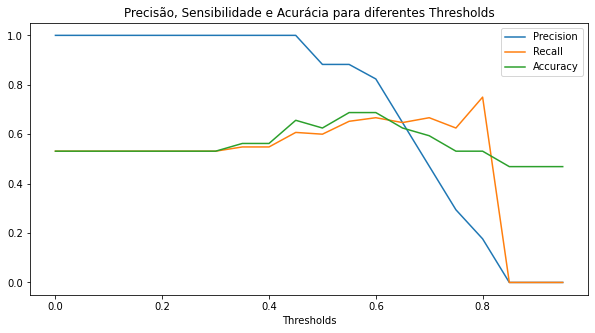

In [27]:
# plotando a curva da Precisão, Sensibilidade e Acurácia 
precisions, recalls, accuracy = precision_recall_accuracy_curve(predict, y)
plot_precision_recall_accuracy_curve(precisions, recalls, accuracy)

In [28]:
# analisando as melhores métricas encontradas para o modelo
best_metrics(threshold = 0.55, predict = predict, y = y)

Matriz de Confusão:
 [[ 7  2]
 [ 8 15]]
Acurácia: 0.6875
Precisão 0.8823529411764706
Sensibilidade: 0.6521739130434783
F1_Score: 0.75


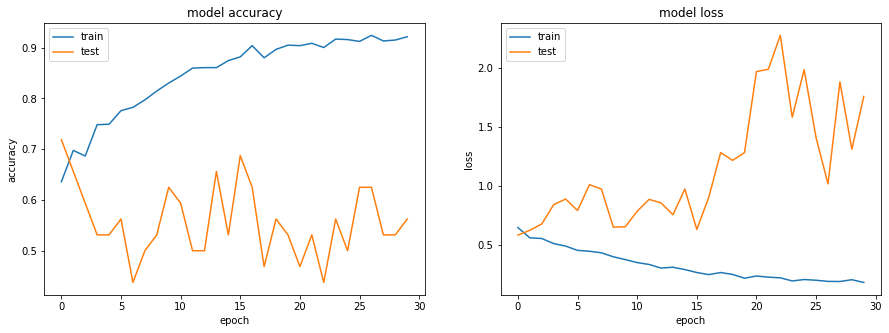

In [29]:
# visualizando o ganho de acurácia durante o treinamento
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model-accuracy')

# visualizando o decaimento da função de custo durante o treinamento 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model-loss')